准确率: 1.0
分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103447
           1       1.00      1.00      1.00       549

    accuracy                           1.00    103996
   macro avg       1.00      1.00      1.00    103996
weighted avg       1.00      1.00      1.00    103996



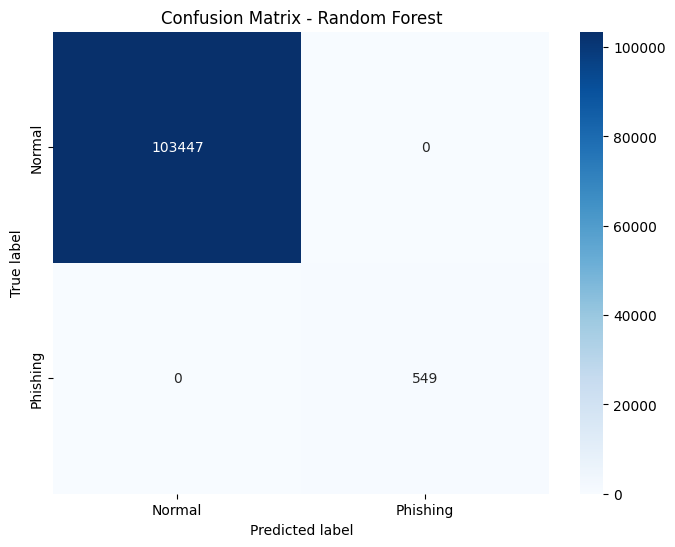

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
file_path = '/Users/jiaoyihan/capstone/capstone_project/Combined_emails_ngram.csv'
data = pd.read_csv(file_path)

# 填充缺失值（这里使用0进行填充，也可以使用其他策略）
data = data.fillna(0)

# 分割特征和标签
X = data.drop('label', axis=1)
y = data['label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Phishing'], yticklabels=['Normal', 'Phishing'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()